In [18]:
# import necessary modules
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt


In [3]:
market_2024 = pd.read_csv("../data/external/2024marketdata_ext.csv")

In [4]:
market_2024.head()

,Unnamed: 0,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",GAFO(1),Motor vehicle and parts dealers,Automobile and other motor vehicle dealers,...,"Office supplies, stationery, and gift stores",Office supplies and stationery stores,"Gift, novelty, and souvenir stores",Used merchandise stores,Nonstore retailers,Electronic shopping and mail-order houses,Fuel dealers,Food services and drinking places,Restaurants and other eating places,Limited service eating places
0,Jan. 2024,"637,342","519,395","590,937","472,990","552,441","434,494","111,547","117,947","107,366",...,"1,893",733,"1,160","1,903","116,402","105,499","5,165","84,901","75,848","38,763"
1,Feb. 2024,"644,825","518,529","597,462","471,166","555,528","429,232","115,707","126,296","115,944",...,"1,914",660,"1,254","1,931","109,322","98,984","4,596","89,297","79,515","39,745"
2,Mar. 2024,"707,637","567,110","654,589","514,062","609,462","468,935","129,000","140,527","128,903",...,"2,100",661,"1,439","2,190","115,867","106,154","3,563","98,175","87,407","43,992"
3,Apr. 2024,"700,302","561,592","645,366","506,656","605,419","466,709","121,802","138,710","126,921",...,"2,127",649,"1,478","2,038","117,532","108,547","3,082","94,883","83,956","43,230"
4,May 2024,"744,554","599,690","686,946","542,082","643,843","498,979","134,944","144,864","132,656",...,"2,447",644,"1,803","2,220","120,648","112,078","2,297","100,711","89,624","45,620"


# Market Data: Selecting Variables

In [11]:
# desired column indices
df_index = [0, 1, 16, 18, 19, 24, 25, 26, 
            28, 31, 40, 50, 56, 57, 58]

# renaming selected columns
new_col = ['month', 'retail_total', 'furniture', 'appliances',
            'electronics', 'food_stores', 'grocery', 'supermarket',
            'hp_care', 'clothes', 'books', 'stationary',
            'food_service', 'restaurants', 'ls_eating']

In [12]:
# create dataframe with desired columns
market_df_uncleaned = pd.DataFrame()
for i in range(len(new_col)):
    market_df_uncleaned[new_col[i]] = market_2024.iloc[:, df_index[i]]

In [13]:
market_df_uncleaned.head()

,month,retail_total,furniture,appliances,electronics,food_stores,grocery,supermarket,hp_care,clothes,books,stationary,food_service,restaurants,ls_eating
0,Jan. 2024,"637,342","5,589","1,622","5,572","79,813","72,636","69,450","36,394","19,188",802,733,"84,901","75,848","38,763"
1,Feb. 2024,"644,825","5,705","1,711","5,556","76,955","69,307","66,099","34,588","22,005",559,660,"89,297","79,515","39,745"
2,Mar. 2024,"707,637","5,995","1,769","5,439","83,248","74,795","71,342","36,238","24,986",596,661,"98,175","87,407","43,992"
3,Apr. 2024,"700,302","5,562","1,741","5,233","78,846","70,765","67,223","35,467","23,993",596,649,"94,883","83,956","43,230"
4,May 2024,"744,554","6,007","1,876","5,768","85,908","76,837","73,068","37,256","27,562",634,644,"100,711","89,624","45,620"


In [ ]:
# export new, cleaned dataset to interim data folder
with open("../data/interim/2024marketdata_int.csv", 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(market_df_uncleaned)

# Market Data: Calculations

In [14]:
market_df = pd.DataFrame({'month':market_df_uncleaned.month})
for col in range(1, len(market_df_uncleaned.columns)):
    market_df[new_col[col]] = [int(i.replace(",", "")) for i in list(market_df_uncleaned[new_col[col]])]

In [15]:
# total spent on retail
# total spent at all grocery/food stores
market_df['grocery_agg'] = market_df.food_stores + market_df.grocery + market_df.supermarket

# total spent on food (groceries + restaurants)
market_df['food_total'] = market_df.grocery_agg + market_df.food_service + market_df.restaurants + market_df.ls_eating

# total spent on school supplies
market_df['school_supplies'] = market_df.books + market_df.stationary


In [ ]:
market_df.head()

,month,retail_total,furniture,appliances,electronics,food_stores,grocery,supermarket,hp_care,clothes,books,stationary,food_service,restaurants,ls_eating,grocery_agg,food_total,school_supplies
0,Jan. 2024,637342,5589,1622,5572,79813,72636,69450,36394,19188,802,733,84901,75848,38763,221899,421411,1535
1,Feb. 2024,644825,5705,1711,5556,76955,69307,66099,34588,22005,559,660,89297,79515,39745,212361,420918,1219
2,Mar. 2024,707637,5995,1769,5439,83248,74795,71342,36238,24986,596,661,98175,87407,43992,229385,458959,1257
3,Apr. 2024,700302,5562,1741,5233,78846,70765,67223,35467,23993,596,649,94883,83956,43230,216834,438903,1245
4,May 2024,744554,6007,1876,5768,85908,76837,73068,37256,27562,634,644,100711,89624,45620,235813,471768,1278


In [23]:
# export new, cleaned dataset to interim data folder
with open("../data/processed/2024marketdata.csv", 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(market_df)

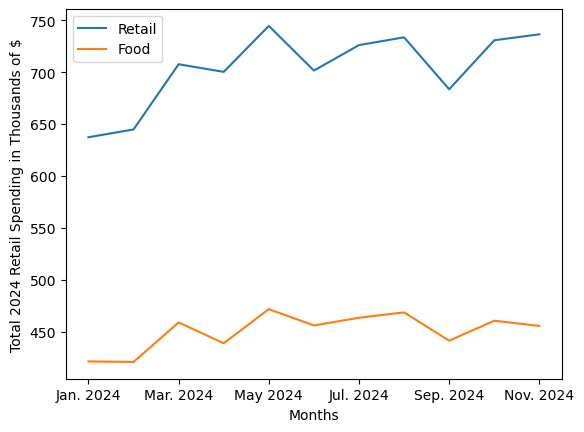

In [27]:
x = range(1, 12)
y = market_df.retail_total[0:11]/1000

y1 = market_df.food_total[0:11]/1000

plt.plot(x, y, label = "Retail")
plt.plot(x, y1, label = "Food")
plt.xlabel("Months")
plt.xticks(range(1, 12, 2), market_df.month[0:11:2])
plt.ylabel("Total 2024 Retail Spending in Thousands of $")
plt.legend()
plt.savefig("../reports/figures/retail_food_market2024.png")
plt.show()

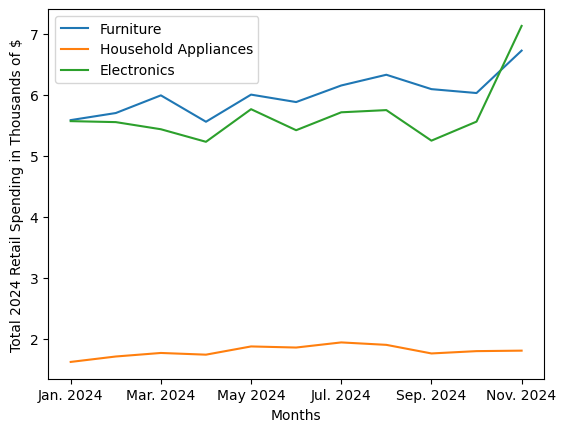

In [30]:
y2 = market_df.furniture[0:11]/1000
y3 = market_df.appliances[0:11]/1000
y4 = market_df.electronics[0:11]/1000
plt.plot(x, y2, label = "Furniture")
plt.plot(x, y3, label = "Household Appliances")
plt.plot(x, y4, label = "Electronics")
plt.xlabel("Months")
plt.xticks(range(1, 12, 2), market_df.month[0:11:2])
plt.ylabel("Total 2024 Retail Spending in Thousands of $")
plt.legend()
plt.savefig("../reports/figures/household_market2024.png")
plt.show()

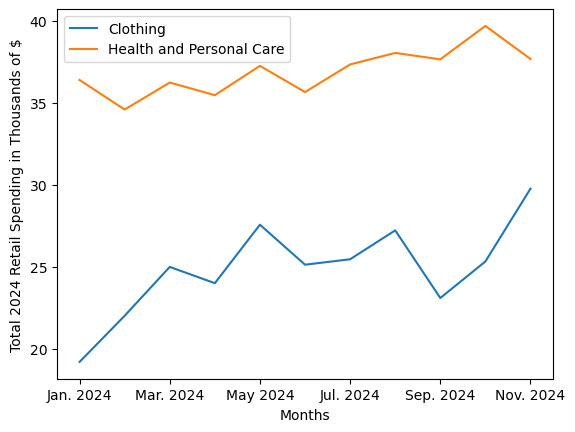

In [29]:
y5 = market_df.clothes[0:11]/1000
y6 = market_df.hp_care[0:11]/1000
plt.plot(x, y5, label = "Clothing")
plt.plot(x, y6, label = "Health and Personal Care")
plt.xlabel("Months")
plt.xticks(range(1, 12, 2), market_df.month[0:11:2])
plt.ylabel("Total 2024 Retail Spending in Thousands of $")
plt.legend()
plt.savefig("../reports/figures/personal_care_market2024.png")
plt.show()